In [1]:
import sys, os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon


In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from fetch_lidar_data import FetchLidarData

In [3]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), 
                    (MINX, MAXY),
                    (MAXX, MAXY), 
                    (MAXX, MINY), 
                    (MINX, MINY)) )

df = FetchLidarData(polygon=polygon, region="IA_FullState", epsg=4326) 

The name of the region is:  IA_FullState
2022-06-27 21:09:02,901 — FetchLidarData — INFO — Successfully Instantiated DataFetcher Class Object


In [4]:
df.get_data()

Pipeline is running ...
2022-06-27 21:09:04,427 — FetchLidarData — INFO — Successfully Extracted Polygon Edges and Polygon Cropping Bounds
2022-06-27 21:09:04,429 — FileHandler — INFO — pipeline_template read successfully
Data Link :  https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json
2022-06-27 21:09:04,430 — FetchLidarData — INFO — Successfully generate Pipeline data
2022-06-27 21:09:21,379 — FetchLidarData — INFO — Data is fetched successfully


In [5]:
elevation = df.generate_geopandasdf() 

Reading Las File from : IA_FullState.las
Generating Points from las File ...
2022-06-27 21:09:32,406 — FetchLidarData — INFO — Elevation points are generated successfully
Making Geopandas Data Frame...
2022-06-27 21:09:39,976 — FetchLidarData — INFO — Geopandas Dataframe generated successfully


In [6]:
elevation.head(10)

,elevation,geometry
0,318.49,POINT (-93.75000 41.92000)
1,318.37,POINT (-93.75000 41.92000)
2,318.41,POINT (-93.75000 41.92000)
3,318.15,POINT (-93.75000 41.92000)
4,318.29,POINT (-93.75000 41.92000)
5,318.31,POINT (-93.75000 41.92000)
6,318.48,POINT (-93.75000 41.92000)
7,318.17,POINT (-93.75000 41.92000)
8,318.20,POINT (-93.75000 41.92000)
9,318.42,POINT (-93.75000 41.92000)


In [57]:
def plot_2d_heatmap(df,column,title):
    """
    plot a 2d heat map of the terrain
    args:
        df (geopndas df): a geopandas dataframe demonstrating the data
        column (str): input column to outline in string
        title (str): input title of the map in string
    return:
        2d heat map of terrain
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    fig.patch.set_alpha(0)
    plt.grid('on', zorder=0)
    df.plot(column=column, ax=ax, legend=True, cmap="terrain")
    plt.title(title) 
    plt.ylabel('Longitude')
    plt.show()

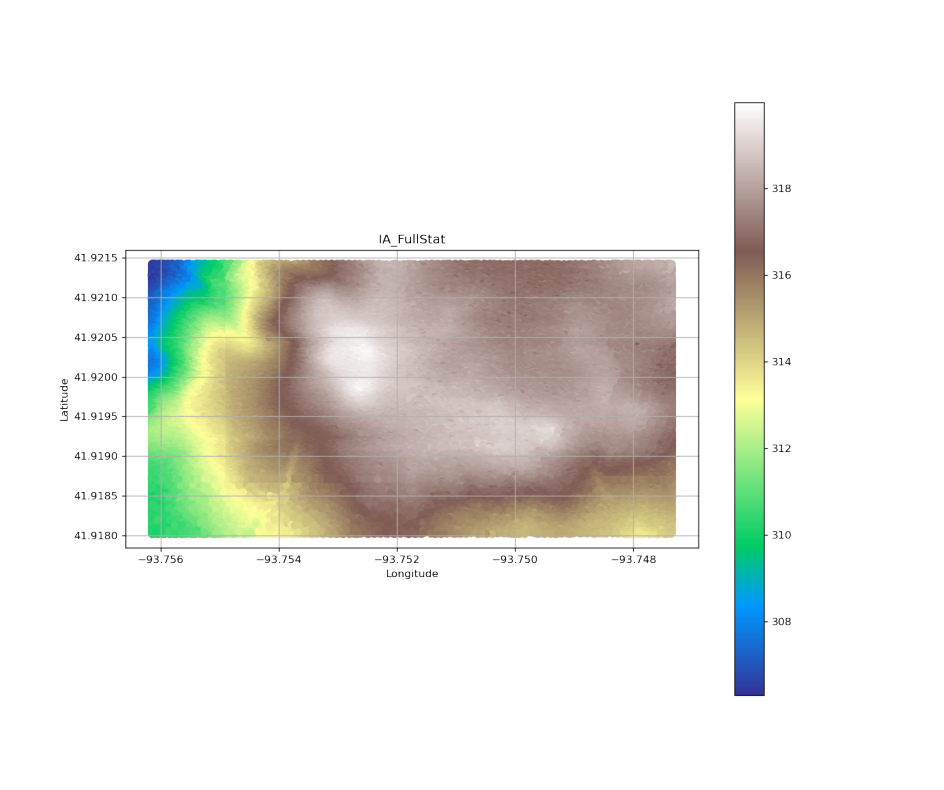

In [ ]:
plot_2d_heatmap(elevation,column='elevation',title="IA_FullStat")